In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys 
import numpy.ma as ma
import scipy.stats as st
import scipy.signal as si
from astropy.io import fits
from astropy.table import Table
import scipy.ndimage.morphology as morph
from matplotlib.backends.backend_pdf import PdfPages

from PIL import Image
import time
import seg_OTMF as sot
import parameters

%matplotlib inline
%reload_ext autoreload

import glob
import matplotlib.image as mpimg

In [2]:
def plot_directions(angle, intensite,pas,taille=1):
    
    S0 = angle.shape[0]
    S1 = angle.shape[1]
    
    y,x = np.ogrid[0:S0,0:S1]
 
    angle2 = angle

    deb_x = np.tile(x,(S0,1)) - taille*np.sin(angle2) * intensite
    deb_y = np.tile(y,(1,S1)) - taille*np.cos(angle2) * intensite
    
    fin_x = np.tile(x,(S0,1)) + taille*np.sin(angle2) * intensite
    fin_y = np.tile(y,(1,S1)) + taille*np.cos(angle2) * intensite
    
    
    for i in range(int(pas/2.),S0,pas):
        for j in range(int(pas/2.),S1,pas):
#            if angle[i,j] != 0:
                plt.plot((deb_x[i,j],fin_x[i,j]), (deb_y[i,j],fin_y[i,j]) ,'k')
    plt.xlim((-0.5,S1-0.5))
    plt.ylim((-0.5,S0-0.5))     

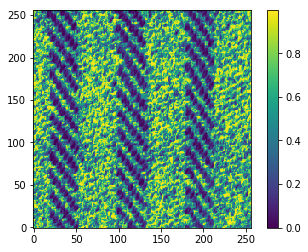

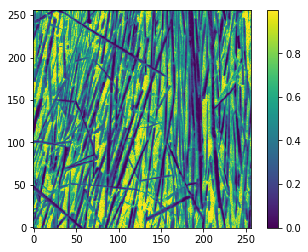

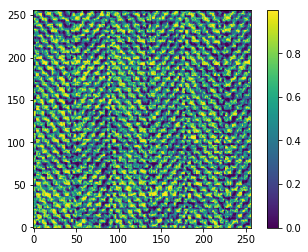

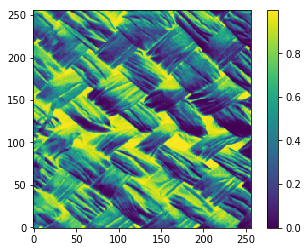

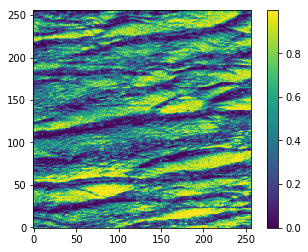

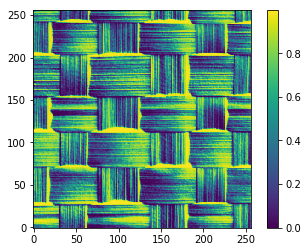

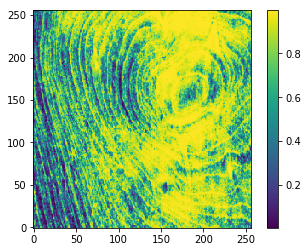

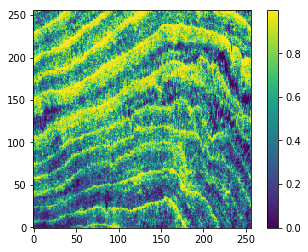

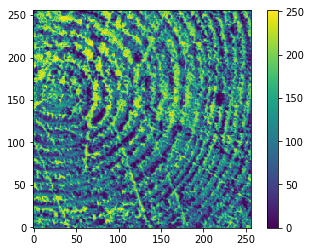

In [3]:
imlist = list()

for id in (11,15,17,18,37,64,69,71,97):
    im = Image.open('./data/brodatz_norm/D'+str(id)+'.tif')
    pi = np.array(im.getdata()).reshape(im.size[0], im.size[1])
    
    if id==69:
        data = pi[350:606,200:456]/256.
    elif id==97:
        data = pi[328:328+256,368:368+256]
    else:

        data = pi[100:356,350:606]/256.
    
    imlist.append(data)
    plt.imshow(data,origin = 'lower',interpolation='nearest'); plt.colorbar()
    plt.show()

In [5]:
nb_level_x = 2
x_range = np.arange(0., 1+1./nb_level_x, 1./nb_level_x)

pas = np.pi/6
v_range = np.arange(pas/2., np.pi, pas)

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 18
     18 x 100 iterations et 338.41 s - 18.801 s/iter.
Serie Gibbs...


seg_OTMF.py:278: RuntimeWarning: divide by zero encountered in divide
  ratios_x = freqs_mpm_x[:,:,np.newaxis]/freqs_marg_x


Serie simu : 100 iterations et 343.55 s - 3.435 s/iter.
Temps total : 683.31 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 18
     18 x 100 iterations et 2615.45 s - 145.303 s/iter.
Serie Gibbs...


seg_OTMF.py:303: RuntimeWarning: divide by zero encountered in divide
  ratios_v = freqs_mpm_v[:,:,np.newaxis]/freqs_marg_v


Serie simu : 100 iterations et 3988.45 s - 39.884 s/iter.
Temps total : 6605.82 s
------------------------------------


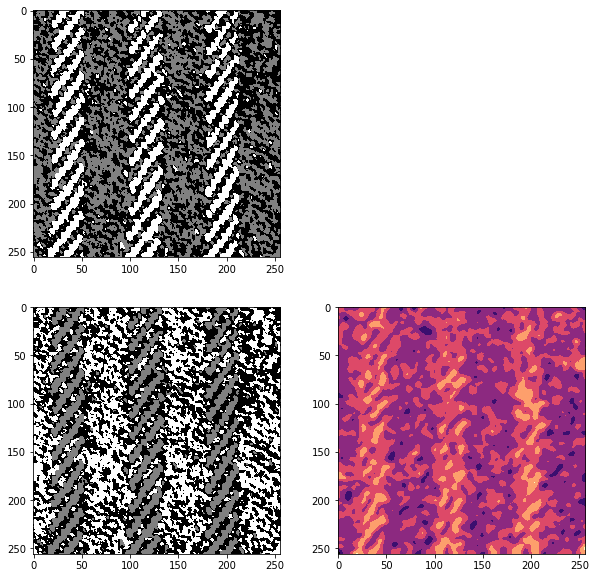

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 197.58 s - 17.962 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 365.42 s - 3.654 s/iter.
Temps total : 563.37 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 1983.78 s - 180.344 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 4256.89 s - 42.569 s/iter.
Temps total : 6243.61 s
------------------------------------


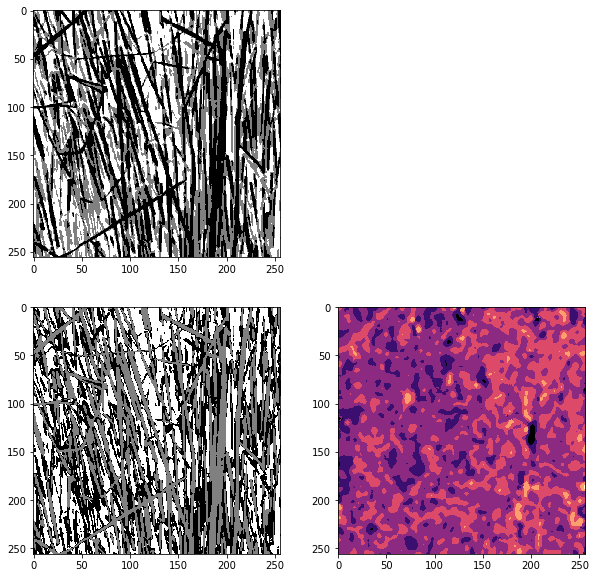

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 12
     12 x 100 iterations et 323.42 s - 26.951 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 453.45 s - 4.535 s/iter.
Temps total : 777.47 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 12
     12 x 100 iterations et 3460.54 s - 288.378 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 5473.61 s - 54.736 s/iter.
Temps total : 8937.13 s
------------------------------------


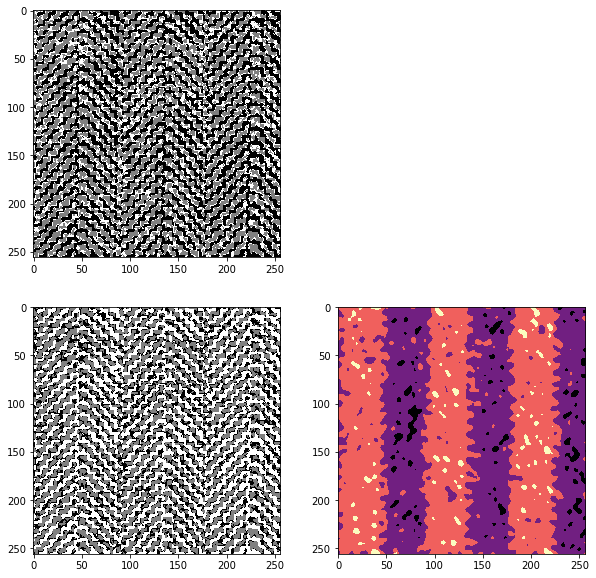

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 274.63 s - 24.967 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 327.83 s - 3.278 s/iter.
Temps total : 602.82 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 2738.74 s - 248.976 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 5402.33 s - 54.023 s/iter.
Temps total : 8143.74 s
------------------------------------


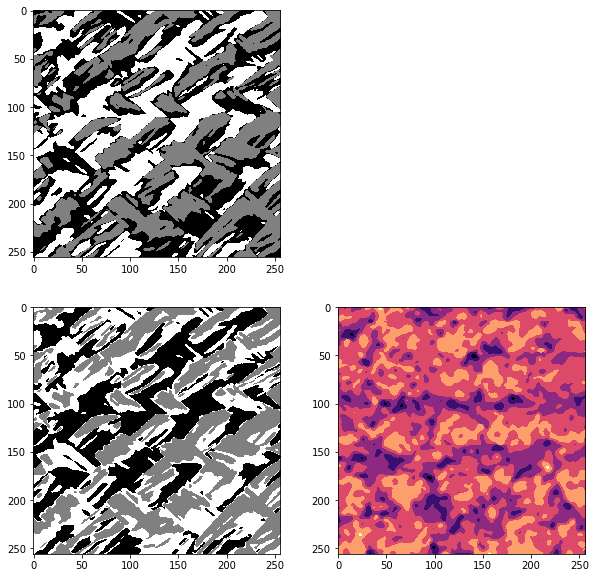

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 393.43 s - 35.766 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 468.12 s - 4.681 s/iter.
Temps total : 862.04 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 2420.93 s - 220.084 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 4790.69 s - 47.907 s/iter.
Temps total : 7215.46 s
------------------------------------


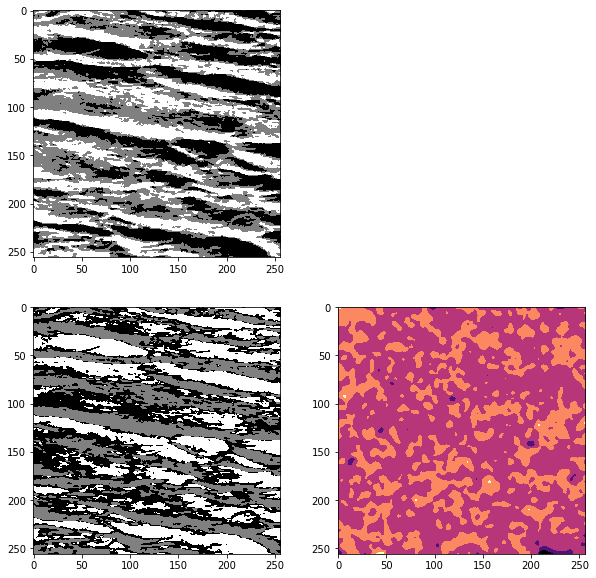

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 465.06 s - 42.278 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 439.80 s - 4.398 s/iter.
Temps total : 905.14 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 3150.68 s - 286.426 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 5783.58 s - 57.836 s/iter.
Temps total : 8937.50 s
------------------------------------


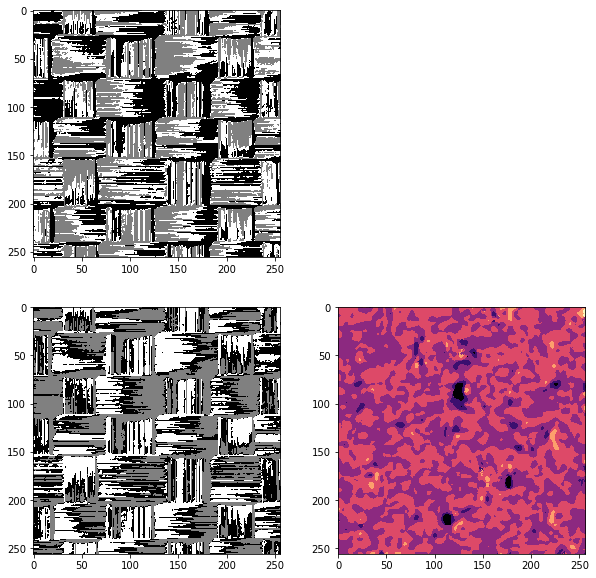

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 21
     21 x 100 iterations et 791.90 s - 37.710 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 382.94 s - 3.829 s/iter.
Temps total : 1175.30 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 20
     20 x 100 iterations et 5174.40 s - 258.720 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 4449.33 s - 44.493 s/iter.
Temps total : 9626.12 s
------------------------------------


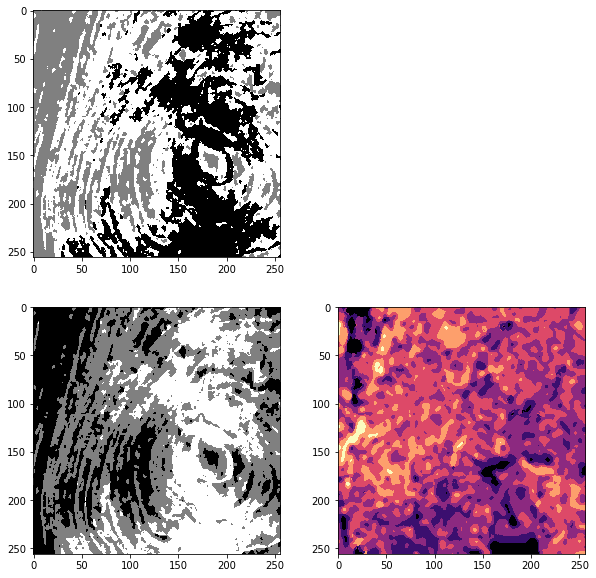

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 14
     14 x 100 iterations et 227.18 s - 16.227 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 281.57 s - 2.816 s/iter.
Temps total : 509.20 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 1894.09 s - 172.190 s/iter.
Serie Gibbs...


/home/miv/courbot/anaconda/lib/python2.7/site-packages/scipy/cluster/vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


Serie simu : 100 iterations et 3885.80 s - 38.858 s/iter.
Temps total : 5781.45 s
------------------------------------


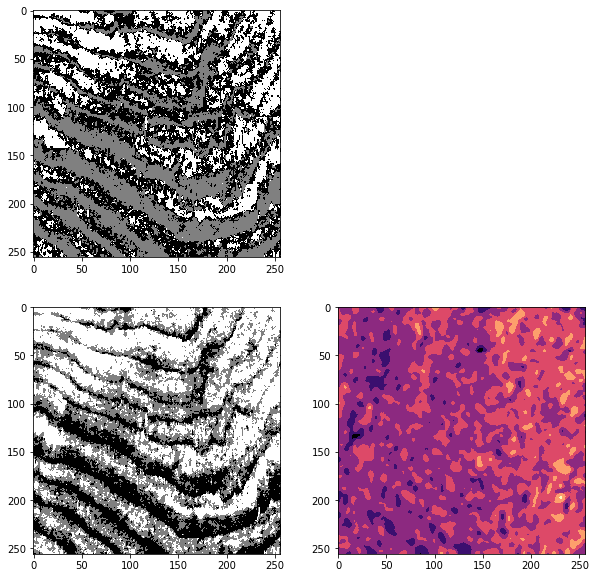

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 247.50 s - 22.500 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 301.22 s - 3.012 s/iter.
Temps total : 548.91 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 1603.89 s - 145.808 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 3740.92 s - 37.409 s/iter.
Temps total : 5347.56 s
------------------------------------


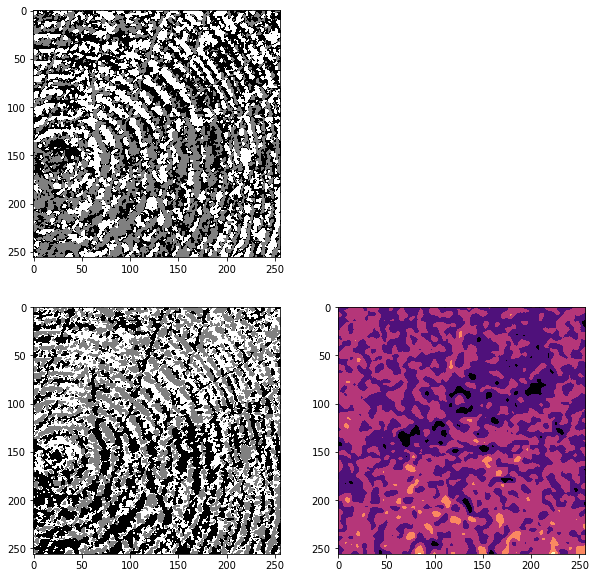

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 16
     16 x 100 iterations et 289.76 s - 18.110 s/iter.
Temps total : 302.98 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 19
     19 x 100 iterations et 3203.08 s - 168.583 s/iter.
Temps total : 3377.88 s
------------------------------------


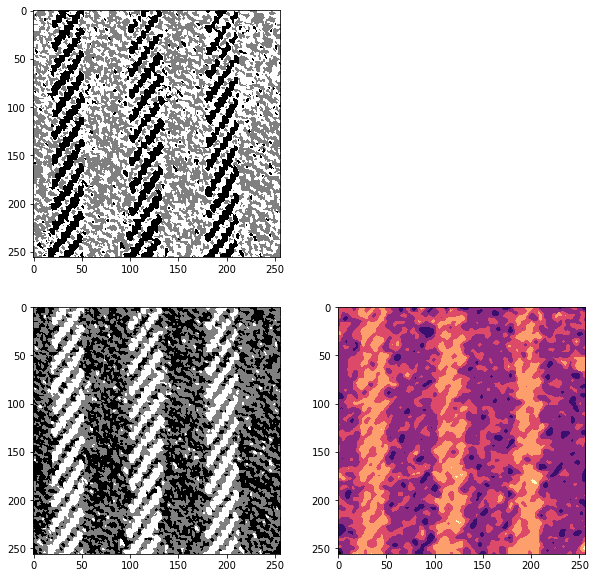

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 267.13 s - 24.285 s/iter.
Temps total : 276.89 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 3090.40 s - 280.946 s/iter.
Temps total : 3336.85 s
------------------------------------


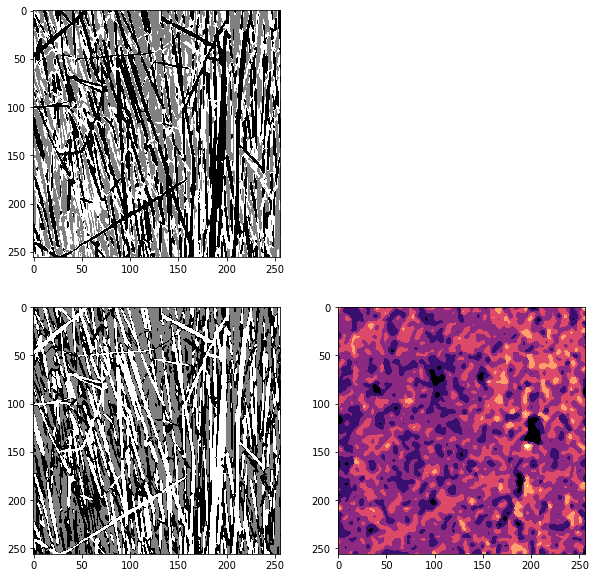

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 12
     12 x 100 iterations et 400.60 s - 33.383 s/iter.
Temps total : 424.53 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 13
     13 x 100 iterations et 3944.53 s - 303.425 s/iter.
Temps total : 4132.35 s
------------------------------------


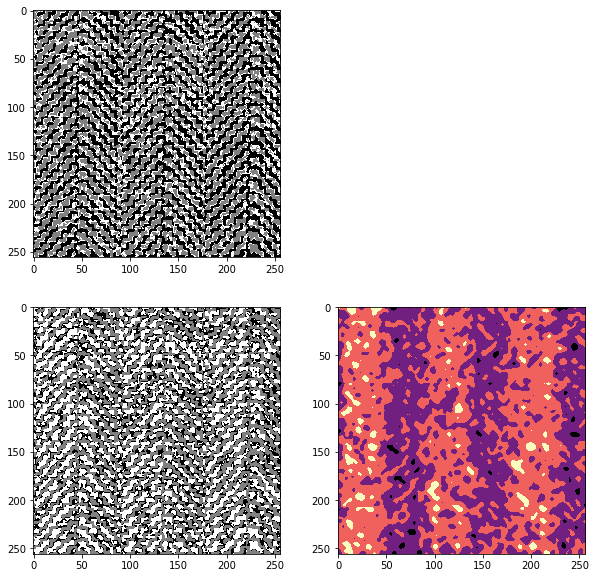

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 259.92 s - 23.629 s/iter.
Temps total : 270.42 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 2504.83 s - 227.712 s/iter.
Temps total : 2665.34 s
------------------------------------


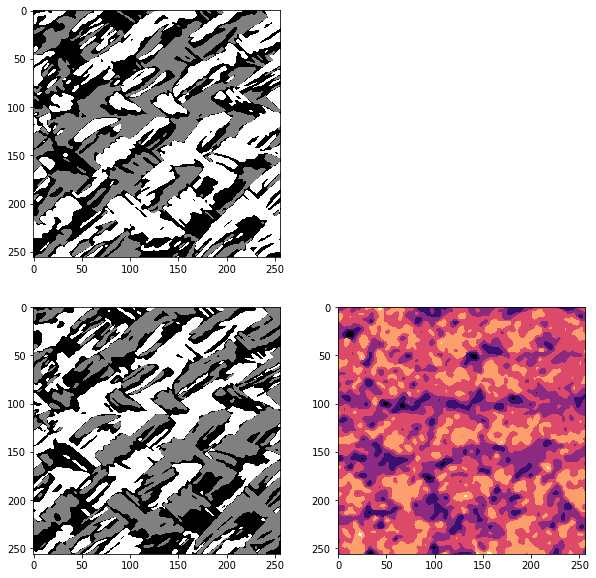

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 254.37 s - 23.125 s/iter.
Temps total : 267.42 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 2797.93 s - 254.358 s/iter.
Temps total : 3006.77 s
------------------------------------


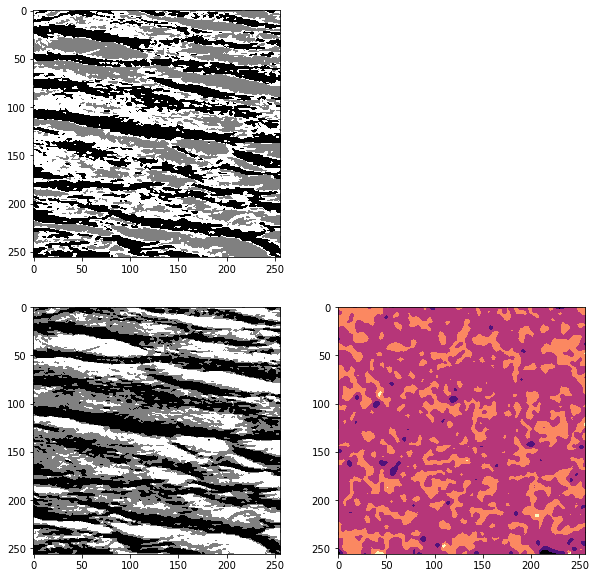

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 456.50 s - 41.500 s/iter.
Temps total : 477.48 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 2699.05 s - 245.368 s/iter.
Temps total : 2820.64 s
------------------------------------


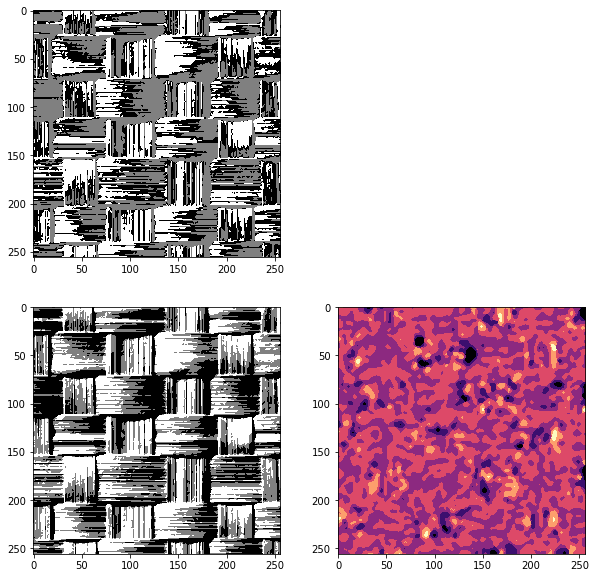

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...

SEM.py:237: RuntimeWarning: Mean of empty slice.
  mu[id_x] = Y_manip[mask].mean()
/home/miv/courbot/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/miv/courbot/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/miv/courbot/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/miv/courbot/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/miv/courbot/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/home/


     39 x 100 iterations et 1012.51 s - 25.962 s/iter.
Temps total : 1026.62 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 21
     21 x 100 iterations et 5083.49 s - 242.071 s/iter.
Temps total : 5305.26 s
------------------------------------


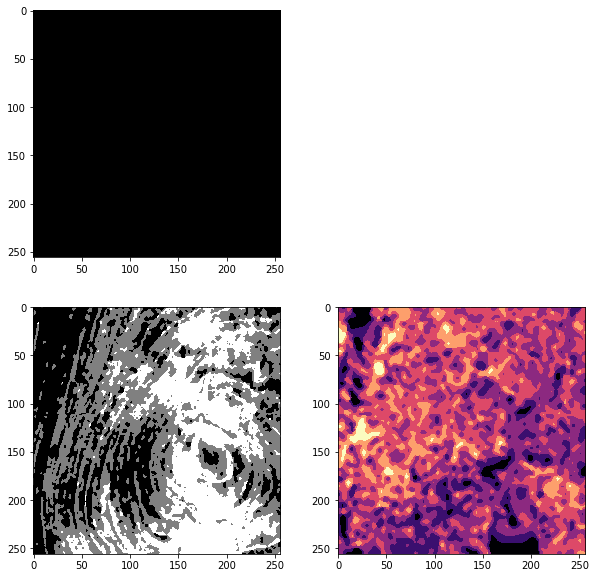

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 12
     12 x 100 iterations et 511.36 s - 42.613 s/iter.
Temps total : 536.33 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 15
     15 x 100 iterations et 4266.68 s - 284.445 s/iter.
Temps total : 4548.78 s
------------------------------------


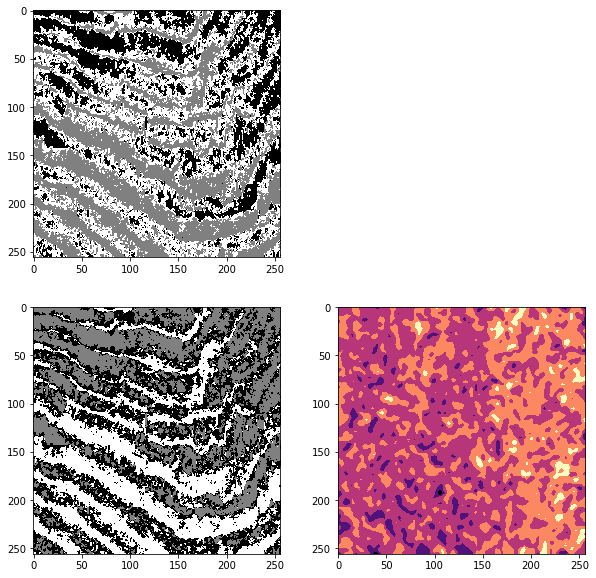

---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 292.67 s - 26.606 s/iter.
Temps total : 306.49 s
------------------------------------
---------------OTMF---------------------
SEM ...
  SEM init...
  SEM iter...
stop iter 11
     11 x 100 iterations et 3282.66 s - 298.423 s/iter.
Temps total : 3447.05 s
------------------------------------


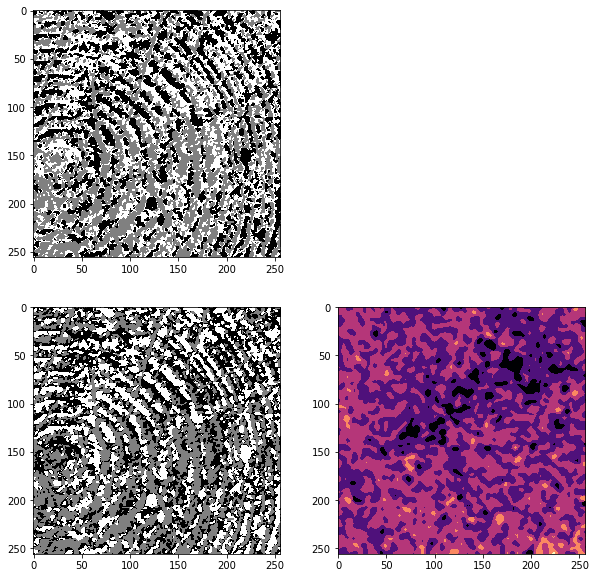

In [6]:

i = 0
numim = len(imlist)#5#16
for mpm in (True,False):
    for im_id in range(numim):#(imlist[3],):

    #    print 'Traitement image numero '+str(im_id)

    #   try:#
            im = imlist[im_id]#[:128,:128]

            Y=np.zeros(shape=(im.shape[0],im.shape[1],1))
            Y[:,:,0] = im

            S0,S1,W = Y.shape

            pargibbs = parameters.ParamsGibbs(S0 = S0,                              S1 = S1,
                                         type_pot = 'potts',                              phi_uni = 0.,
                                         thr_conv=0.001,                             nb_iter=100,
                                         fuzzy=False,                             anisotropic=True,   
                                         angle=np.zeros(shape=(S0,S1)),
                                         beta = 1.,                             phi_theta_0 = 0.,
                                         alpha =5,                             alpha_v = 10,
                                         delta = 0.,                             init_method = 'std',
                                         nb_fuzzy = 256. ,                             v_range = v_range,
                                         x_range = x_range                             )# beta=1.25,

            pargibbs.S0 = S0
            pargibbs.S1 = S1
            pargibbs.W = W

            pargibbs.Y = Y

            #==============================================================================
            # Paramètres à fixer
            #==============================================================================

            incert = True # Utilisation ou non de segmentation avec incertitude

            parseg = parameters.ParamsSeg(nb_iter_sem=40,
                                          seuil_conv = 1*(1./S0*S1),
                                          incert = incert
                                            )

            parseg.multi = True # le multiclasse discret
            parseg.seuil_conv = 0.05
            parseg.nb_rea = 100
            parseg.taille_fen=10
            parseg.spec_snr=False

            parseg.weights=np.ones(shape=(Y.shape[0],Y.shape[1]))
            parseg.mpm = mpm

            #
            #==============================================================================
            # Segmentation HMF
            #==============================================================================
            parseg.tmf = False
            pargibbs = parameters.apply_parseg_pargibbs(parseg,pargibbs) # transfetrt a l'autre jeu de parametre
            #pargibbs.thr_conv = 10./(128*128)
            print '---------------HMF---------------------'
            start = time.time()

            Y_courant = np.copy(Y)

            pargibbs.Y = Y_courant
            #pargibbs.X_init = X

            X_mpm_hmf,V_mpm_hmf,Ux_hmf,Uv_hmf, parsem_hmf = sot.seg_otmf(parseg,pargibbs)

            ## 
            end = time.time() - start
            print 'Temps total : %.2f s'%end  
            print '------------------------------------'
            #
            ###
            ###
            ###==============================================================================
            ### Segmentation OTMF
            #####==============================================================================
            parseg.tmf = True



            #try:

            print '---------------OTMF---------------------'
            start = time.time()

            pargibbs = parameters.apply_parseg_pargibbs(parseg,pargibbs) 
            X_mpm_tmf,V_mpm_tmf,Ux_tmf,Uv_tmf, parsem_tmf = sot.seg_otmf(parseg,pargibbs)

            end = time.time() - start
            print 'Temps total : %.2f s'%end  
            print '------------------------------------'
            
            if mpm :
                nom_mpm = 'MPM'
            else:
                nom_mpm = 'MAP'
                
            np.savez('./results/banc_test/'+str(im_id)+'_'+nom_mpm, X_mpm_tmf=X_mpm_tmf,
                                                     X_mpm_hmf=X_mpm_hmf,
                                                    V_mpm_tmf=V_mpm_tmf,
                                                     Ux_hmf=Ux_hmf,
                                                    Ux_tmf=Ux_tmf,
                                                    Uv_tmf=Uv_tmf,
                                                    Y=Y)

            plt.figure(figsize=(10,10))
            plt.subplot(221)
            plt.imshow(X_mpm_hmf,cmap=plt.cm.gray)

            plt.subplot(223)
            plt.imshow(X_mpm_tmf,cmap=plt.cm.gray)

            plt.subplot(224)
            plt.imshow(V_mpm_tmf,cmap=plt.cm.magma)
            plt.show()
    #   except:
    #       print 'erreur !'
    #       pass



        

In [9]:
nb_li=2
nb_col=3
cm_gris=plt.cm.gray

doc_pdf = PdfPages('./results/banc_test/catalogue.pdf')

for im_id in range(numim):#(imlist[3],):
    
    print 'Traitement image numero '+str(im_id)
    d=np.load('./results/banc_test/'+str(im_id)+'.npz')


    #X_mpm_tmf, V_mpm_tmf,Ux_tmf,Uv_tmf,Y = d.f.X_mpm_tmf, d.f.V_mpm_tmf,d.f.Ux_tmf,d.f.Uv_tmf,d.f.Y

    X_mpm_tmf=d.f.X_mpm_tmf
    X_mpm_hmf=d.f.X_mpm_hmf
    V_mpm_tmf=d.f.V_mpm_tmf
    Ux_tmf=d.f.Ux_tmf
    Uv_tmf=d.f.Uv_tmf
    Y = d.f.Y
    
    fig=plt.figure(figsize=(4.5*nb_col,4*nb_li))


    plt.subplot(nb_li,nb_col,1)
    plt.imshow(Y.mean(axis=2), interpolation='nearest', origin='lower', cmap=cm_gris)#,vmin = -1,vmax=1); 
    #plt.axis('off')
    plt.title('$\mathbf{y}$')


    plt.subplot(nb_li,nb_col,2)
    X_tmf = np.copy(X_mpm_tmf)

    plt.imshow(X_tmf, interpolation='nearest', origin='lower', cmap=cm_gris)#,vmin=0,vmax=1); 
    plt.title('$\\hat{\mathbf{x}}_{\mathrm{MPM}}$ ')


    plt.subplot(nb_li,nb_col,3)
    plt.imshow(V_mpm_tmf, interpolation='nearest', origin='lower', cmap=plt.cm.magma,alpha=0.5);#plt.imshow(V_mpm_est, interpolation='nearest', origin='lower', cmap=cm_angl,vmin=0,vmax=np.pi); 
    plot_directions(V_mpm_tmf, np.ones_like(V_mpm_tmf),pas=8,taille=0.75)


    plt.subplot(nb_li,nb_col,5)
    X_hmf = np.copy(X_mpm_hmf)

    plt.imshow(X_hmf, interpolation='nearest', origin='lower', cmap=cm_gris)#,vmin=0,vmax=1); 
    plt.title('$\\hat{\mathbf{x}}_{\mathrm{MPM}}$ ')

    #plt.subplot(nb_li,nb_col,5)
    #plt.imshow(Ux_tmf, interpolation='nearest', origin='lower', cmap=plt.cm.gray,vmin=0,vmax=1); 
    ##plt.axis('off')
    #plt.title('$\\hat{\mathbf{u}}^x$')
    #plt.colorbar(fraction=0.046,pad=0.04)
#
#
    #plt.subplot(nb_li,nb_col,6)
    #plt.imshow(Uv_tmf, interpolation='nearest', origin='lower',cmap=plt.cm.gray,vmin=0, vmax=1); 
    #plt.colorbar(fraction=0.046,pad=0.04)
    ##plt.axis('off')
    #plt.title('$\\hat{\mathbf{u}}^v$')


    plt.tight_layout()
              
    doc_pdf.savefig(fig)
    plt.close(fig)


doc_pdf.close()

Traitement image numero 0
Traitement image numero 1
Traitement image numero 2
Traitement image numero 3
Traitement image numero 4
Traitement image numero 5
Traitement image numero 6
Traitement image numero 7
Traitement image numero 8


In [9]:
d